In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 100)

# Flight Data

In [43]:
df = pd.read_csv('../src/data/flights.csv', parse_dates=True)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Glossary

- FL_DATE = Date of the Flight
- OP_CARRIER = Airline Identifier
- OP_CARRIER_FL_NUM = Flight Number
- ORIGIN = Starting Airport Code
- DEST = Destination Airport Code
- CRS_DEP_TIME = Planned Departure Time
- DEP_TIME = Actual Departure Time
- DEP_DELAY = Total Delay on Departure in minutes
- TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off
- WHEELS_OFF = The time point that the aircraft's wheels leave the ground
- WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground
- TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport
- CRS_ARR_TIME = Planned arrival time
- ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL
- ARR_DELAY = Total Delay on Arrival in minutes
- CANCELLED = Flight Cancelled (1 = cancelled)
- CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
- DIVERTED = Aircraft landed on different airport that the one scheduled
- CRS_ELAPSED_TIME = Planned amount of time needed for the flight trip
- ACTUAL_ELAPSED_TIME = AIR_TIME+TAXI_IN+TAXI_OUT
- AIR_TIME = The time duration between wheels_off and wheels_on time
- DISTANCE = Distance between two airports
- CARRIER_DELAY = Delay caused by the airline in minutes
- WEATHER_DELAY = Delay caused by weather
- NAS_DELAY = Delay caused by air system
- SECURITY_DELAY = caused by security reasons
- LATE_AIRCRAFT_DELAY = Delay caused by security

In [44]:
df.shape

(1048575, 31)

In [45]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [46]:
cols = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'AIR_TIME', 'DISTANCE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DIVERTED', 'WEATHER_DELAY']
df[cols]

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN
1,2015,1,1,4,2336,AA,N3KUAA,LAX,PBI,2.0,741.0,263.0,2330,-8.0,-9.0,0,NaN
2,2015,1,1,4,840,US,N171US,SFO,CLT,18.0,811.0,266.0,2296,-2.0,5.0,0,NaN
3,2015,1,1,4,258,AA,N3HYAA,LAX,MIA,15.0,756.0,258.0,2342,-5.0,-9.0,0,NaN
4,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,4122,EV,N11191,RDU,EWR,1005.0,1133.0,64.0,416,-8.0,-16.0,0,NaN
1048571,2015,3,10,2,1018,UA,N79279,LGA,IAH,1005.0,1335.0,219.0,1416,-8.0,-2.0,0,NaN
1048572,2015,3,10,2,1260,UA,N76508,SAN,ORD,1010.0,1627.0,220.0,1723,-3.0,3.0,0,NaN
1048573,2015,3,10,2,4349,EV,N14158,MSY,ORD,1003.0,1229.0,127.0,837,-10.0,-13.0,0,NaN


## Joining the data with the airlines

In [47]:
df_merged = pd.DataFrame()

In [48]:
airline = pd.read_csv('../src/data/airlines.csv')
df_merged = df[cols].merge(airline, left_on='AIRLINE', right_on='IATA_CODE', suffixes=('_CODE', '_NAME'))
df_merged.drop('IATA_CODE', axis=1, inplace=True)
df_merged

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN,Alaska Airlines Inc.
1,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN,Alaska Airlines Inc.
2,2015,1,1,4,108,AS,N309AS,ANC,SEA,41.0,455.0,173.0,1448,-4.0,-14.0,0,NaN,Alaska Airlines Inc.
3,2015,1,1,4,122,AS,N413AS,ANC,PDX,46.0,507.0,187.0,1542,-4.0,-18.0,0,NaN,Alaska Airlines Inc.
4,2015,1,1,4,130,AS,N457AS,FAI,SEA,107.0,545.0,186.0,1533,-8.0,-3.0,0,NaN,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,953,VX,N529VA,SAN,SFO,1044.0,1214.0,71.0,447,79.0,74.0,0,0.0,Virgin America
1048571,2015,3,10,2,251,VX,N853VA,JFK,LAS,940.0,1233.0,317.0,2248,-5.0,-2.0,0,NaN,Virgin America
1048572,2015,3,10,2,69,VX,N626VA,IAD,SFO,957.0,1230.0,316.0,2419,-3.0,-25.0,0,NaN,Virgin America
1048573,2015,3,10,2,956,VX,N623VA,SFO,SAN,953.0,1115.0,67.0,447,-7.0,-15.0,0,NaN,Virgin America


In [49]:
df_merged.query('MONTH == 10')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME


## Joining the data with the airports

### Merge the airports with the destination airports

In [50]:
airports = pd.read_csv('../src/data/airports.csv')
df_merged_destination = df_merged.merge(airports[['IATA_CODE', 'AIRPORT']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
df_merged_destination.drop('IATA_CODE', axis=1, inplace=True)
df_merged_destination.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_NAME'}, inplace=True)
df_merged_destination.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME,DESTINATION_AIRPORT_NAME
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport
1,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport
2,2015,1,1,4,108,AS,N309AS,ANC,SEA,41.0,455.0,173.0,1448,-4.0,-14.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport
3,2015,1,1,4,122,AS,N413AS,ANC,PDX,46.0,507.0,187.0,1542,-4.0,-18.0,0,NaN,Alaska Airlines Inc.,Portland International Airport
4,2015,1,1,4,130,AS,N457AS,FAI,SEA,107.0,545.0,186.0,1533,-8.0,-3.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport


### Add the origin and destination airports to the flights

In [51]:
df_merged = df_merged_destination.copy()

## Add new columns

In [52]:
df_merged['FLIGHT_DATE'] = pd.to_datetime(df_merged[['YEAR', 'MONTH', 'DAY']])
df_merged['Delayed'] = np.where(df_merged['ARRIVAL_DELAY'] > 15, 1, 0)
df_merged.head()  

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME,DESTINATION_AIRPORT_NAME,FLIGHT_DATE,Delayed
0,2015,1,1,4,98,AS,N407AS,ANC,SEA,2354.0,408.0,169.0,1448,-11.0,-22.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,2015-01-01,0
1,2015,1,1,4,135,AS,N527AS,SEA,ANC,24.0,259.0,199.0,1448,-1.0,-21.0,0,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,2015-01-01,0
2,2015,1,1,4,108,AS,N309AS,ANC,SEA,41.0,455.0,173.0,1448,-4.0,-14.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,2015-01-01,0
3,2015,1,1,4,122,AS,N413AS,ANC,PDX,46.0,507.0,187.0,1542,-4.0,-18.0,0,NaN,Alaska Airlines Inc.,Portland International Airport,2015-01-01,0
4,2015,1,1,4,130,AS,N457AS,FAI,SEA,107.0,545.0,186.0,1533,-8.0,-3.0,0,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,2015-01-01,0


## Cleaning the Data

In [53]:
df_merged.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
FLIGHT_NUMBER                    0
AIRLINE_CODE                     0
TAIL_NUMBER                   7750
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
DEPARTURE_TIME               39515
ARRIVAL_TIME                 41296
AIR_TIME                     43071
DISTANCE                         0
DEPARTURE_DELAY              39515
ARRIVAL_DELAY                43071
DIVERTED                         0
WEATHER_DELAY               820047
AIRLINE_NAME                     0
DESTINATION_AIRPORT_NAME         0
FLIGHT_DATE                      0
Delayed                          0
dtype: int64

In [54]:
df_merged[df_merged.isnull().any(axis=1)].value_counts()

Series([], Name: count, dtype: int64)

In [55]:
def percent_hbar(df, old_threshold=None):
    sns.set()
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(20, 16), color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    plt.title('Percentage of Missing Values (from {:,} rows)'.format(len(df)), fontsize=20)
    plt.show()

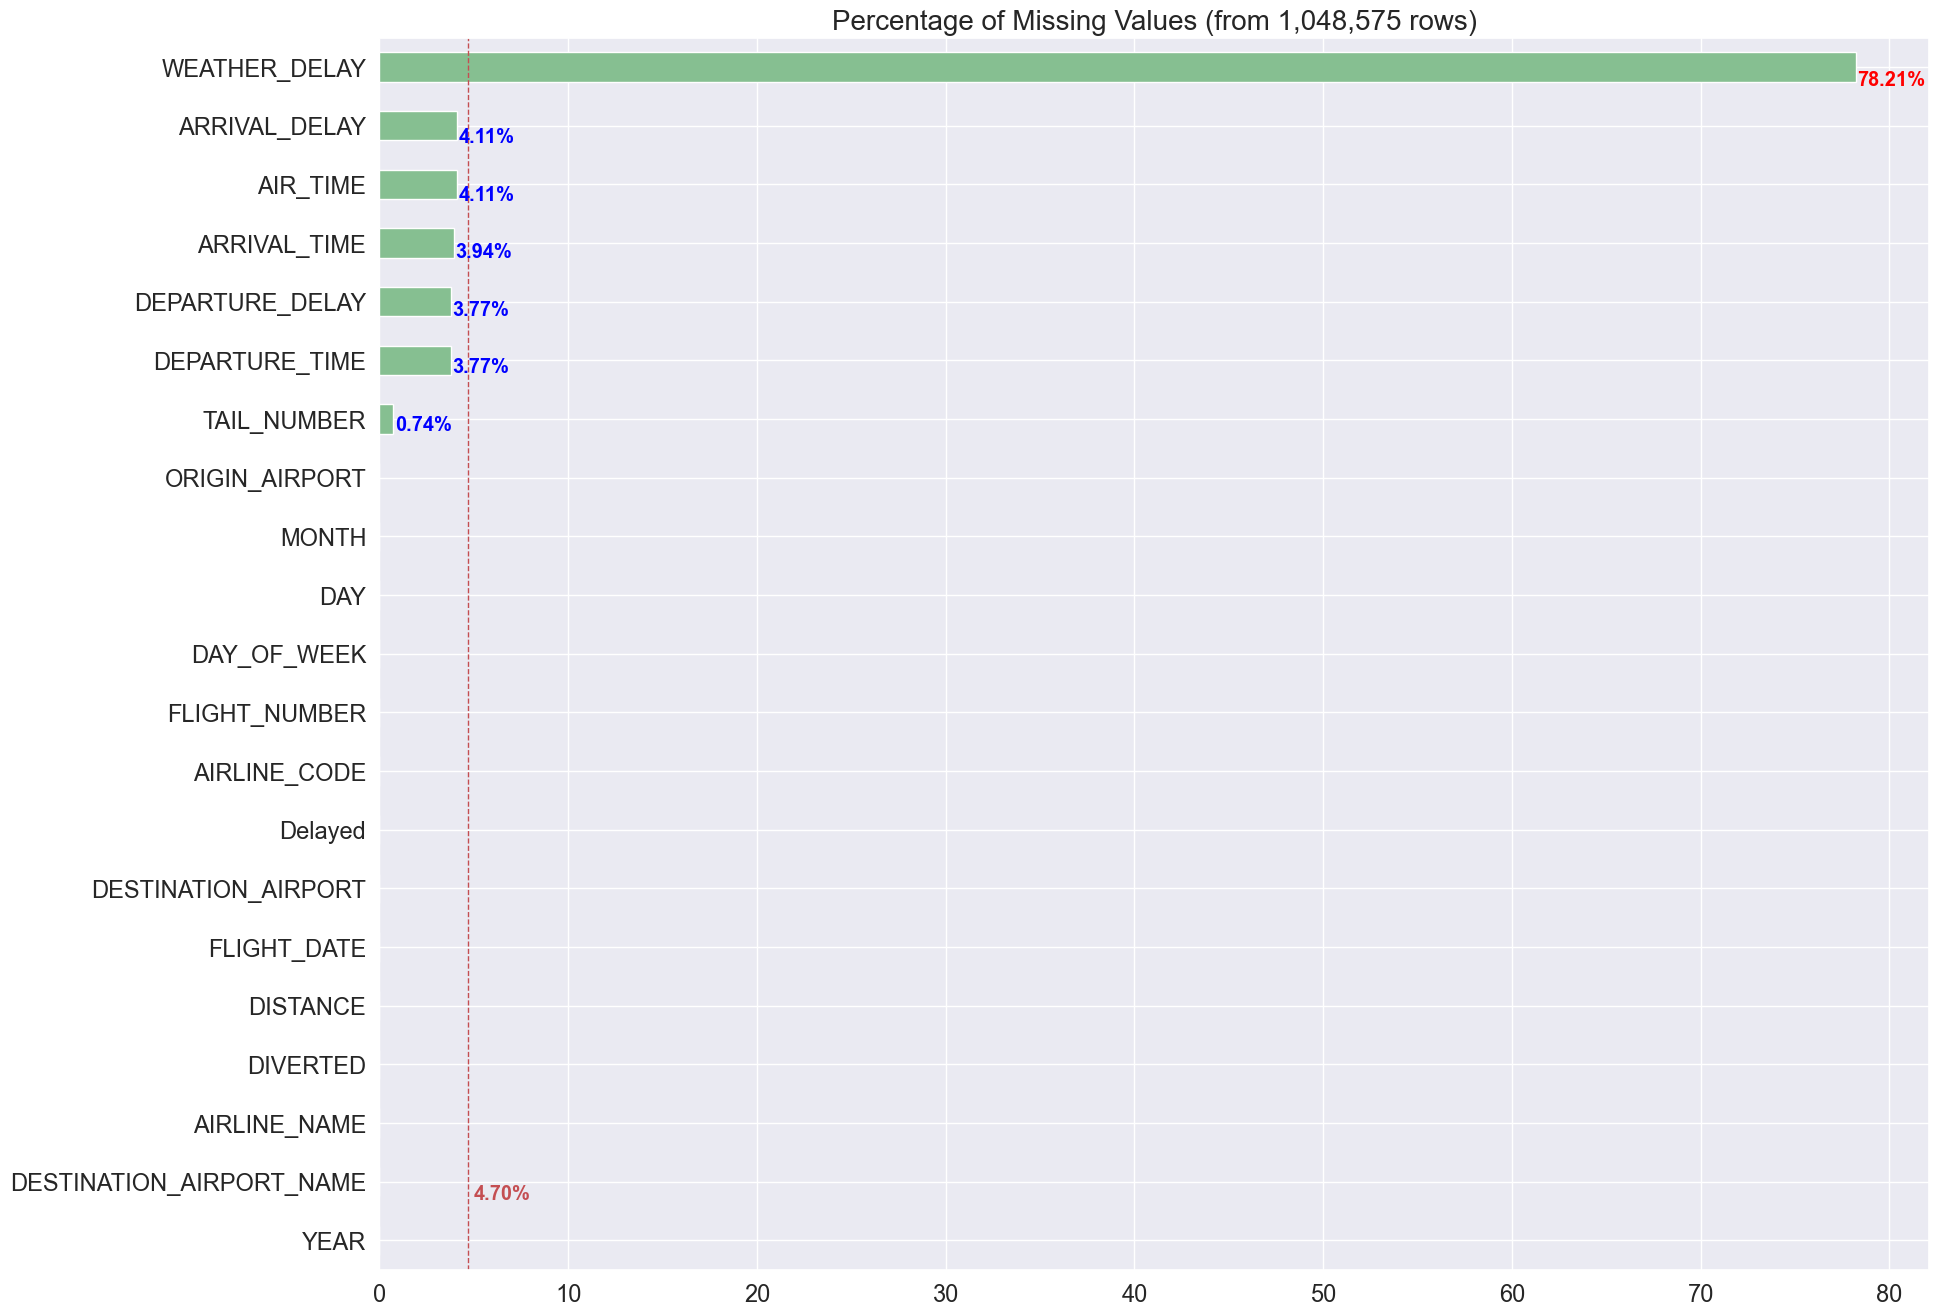

In [56]:
percent_hbar(df_merged)

In [57]:
df_merged.dropna(subset=['TAIL_NUMBER', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'], inplace=True)
df_merged.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
FLIGHT_NUMBER                    0
AIRLINE_CODE                     0
TAIL_NUMBER                      0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
DEPARTURE_TIME                   0
ARRIVAL_TIME                     0
AIR_TIME                         0
DISTANCE                         0
DEPARTURE_DELAY                  0
ARRIVAL_DELAY                    0
DIVERTED                         0
WEATHER_DELAY               776976
AIRLINE_NAME                     0
DESTINATION_AIRPORT_NAME         0
FLIGHT_DATE                      0
Delayed                          0
dtype: int64

In [58]:
df_merged.WEATHER_DELAY.fillna(0, inplace=True)
df_merged.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
FLIGHT_NUMBER               0
AIRLINE_CODE                0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
DEPARTURE_TIME              0
ARRIVAL_TIME                0
AIR_TIME                    0
DISTANCE                    0
DEPARTURE_DELAY             0
ARRIVAL_DELAY               0
DIVERTED                    0
WEATHER_DELAY               0
AIRLINE_NAME                0
DESTINATION_AIRPORT_NAME    0
FLIGHT_DATE                 0
Delayed                     0
dtype: int64

In [59]:
# check duplicated rows
df_merged.duplicated().sum()

0

# Weather Data

In [60]:
weather = pd.read_csv('../src/data/weather.csv')
weather

,STATION,NAME,DATE,AWND,PRCP,SNOW,TMAX,TMIN,airport_code
0,USW00024131,"BOISE AIR TERMINAL, ID US",1/1/2015,2.01,0.00,0.0,18,6,BOI
1,USW00024131,"BOISE AIR TERMINAL, ID US",1/2/2015,3.36,0.00,0.0,20,8,BOI
2,USW00024131,"BOISE AIR TERMINAL, ID US",1/3/2015,3.36,0.00,0.0,25,12,BOI
3,USW00024131,"BOISE AIR TERMINAL, ID US",1/4/2015,1.12,0.02,0.1,32,19,BOI
4,USW00024131,"BOISE AIR TERMINAL, ID US",1/5/2015,3.58,0.11,0.1,39,29,BOI
...,...,...,...,...,...,...,...,...,...
21889,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",12/27/2015,4.47,0.01,0.0,48,34,SFO
21890,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",12/28/2015,5.14,0.11,0.0,48,41,SFO
21891,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",12/29/2015,2.91,0.00,0.0,54,36,SFO
21892,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",12/30/2015,6.93,0.01,0.0,49,40,SFO


In [61]:
weather.isnull().sum()

STATION         0
NAME            0
DATE            0
AWND            0
PRCP            0
SNOW            0
TMAX            0
TMIN            0
airport_code    0
dtype: int64

In [62]:
weather.dtypes

STATION          object
NAME             object
DATE             object
AWND            float64
PRCP            float64
SNOW            float64
TMAX              int64
TMIN              int64
airport_code     object
dtype: object

In [63]:
weather.DATE = pd.to_datetime(weather.DATE)
weather.dtypes

STATION                 object
NAME                    object
DATE            datetime64[ns]
AWND                   float64
PRCP                   float64
SNOW                   float64
TMAX                     int64
TMIN                     int64
airport_code            object
dtype: object

In [64]:
cols = ['DATE', 'AWND', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'airport_code']
df_merged_weather = pd.merge_ordered(df_merged, weather[cols], left_on=('DESTINATION_AIRPORT', 'FLIGHT_DATE'), right_on=('airport_code', 'DATE'), how='left')
df_merged_weather.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,ARRIVAL_TIME,AIR_TIME,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,WEATHER_DELAY,AIRLINE_NAME,DESTINATION_AIRPORT_NAME,FLIGHT_DATE,Delayed,DATE,AWND,PRCP,SNOW,TMAX,TMIN,airport_code
0,2015,1,1,4,5267,EV,N131EV,ATL,ABE,1333.0,1526.0,94.0,692,-2.0,1.0,0,0.0,Atlantic Southeast Airlines,Lehigh Valley International Airport,2015-01-01,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,5411,EV,N849AS,DTW,ABE,1521.0,1632.0,55.0,425,-4.0,-21.0,0,0.0,Atlantic Southeast Airlines,Lehigh Valley International Airport,2015-01-01,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,4311,EV,N15912,ORD,ABE,1812.0,2057.0,77.0,654,-8.0,-12.0,0,0.0,Atlantic Southeast Airlines,Lehigh Valley International Airport,2015-01-01,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,5072,EV,N538CA,ATL,ABE,2101.0,2249.0,85.0,692,0.0,-2.0,0,0.0,Atlantic Southeast Airlines,Lehigh Valley International Airport,2015-01-01,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,5,5267,EV,N131EV,ATL,ABE,1333.0,1508.0,84.0,692,-2.0,-17.0,0,0.0,Atlantic Southeast Airlines,Lehigh Valley International Airport,2015-01-02,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_merged_weather.shape

(1005504, 28)

In [66]:
df_merged_weather.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
FLIGHT_NUMBER                    0
AIRLINE_CODE                     0
TAIL_NUMBER                      0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
DEPARTURE_TIME                   0
ARRIVAL_TIME                     0
AIR_TIME                         0
DISTANCE                         0
DEPARTURE_DELAY                  0
ARRIVAL_DELAY                    0
DIVERTED                         0
WEATHER_DELAY                    0
AIRLINE_NAME                     0
DESTINATION_AIRPORT_NAME         0
FLIGHT_DATE                      0
Delayed                          0
DATE                        274959
AWND                        274959
PRCP                        274959
SNOW                        274959
TMAX                        274959
TMIN                        274959
airport_code                274959
dtype: int64

In [67]:
"""changing the column names from snake case to camel case"""

# change the column names from upper case to lower case
df_merged_weather.columns = df_merged_weather.columns.str.lower().str.replace('_', ' ')
# change the first letter of each column name to upper case
df_merged_weather.columns = df_merged_weather.columns.str.title()
df_merged_weather.columns = df_merged_weather.columns.str.replace(' ', '')
df_merged_weather.columns

# change the column names from upper case to lower case
df_merged.columns = df_merged.columns.str.lower().str.replace('_', ' ')
# change the first letter of each column name to upper case
df_merged.columns = df_merged.columns.str.title()
df_merged.columns = df_merged.columns.str.replace(' ', '')
df_merged.columns

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'FlightNumber', 'AirlineCode',
       'TailNumber', 'OriginAirport', 'DestinationAirport', 'DepartureTime',
       'ArrivalTime', 'AirTime', 'Distance', 'DepartureDelay', 'ArrivalDelay',
       'Diverted', 'WeatherDelay', 'AirlineName', 'DestinationAirportName',
       'FlightDate', 'Delayed'],
      dtype='object')

In [68]:
df_merged_weather.to_csv('../src/data/processed/flights_weather.csv', index=False)
df_merged.to_csv('../src/data/processed/flights.csv', index=False)

In [69]:
df_merged_weather.isnull().sum()

Year                           0
Month                          0
Day                            0
DayOfWeek                      0
FlightNumber                   0
AirlineCode                    0
TailNumber                     0
OriginAirport                  0
DestinationAirport             0
DepartureTime                  0
ArrivalTime                    0
AirTime                        0
Distance                       0
DepartureDelay                 0
ArrivalDelay                   0
Diverted                       0
WeatherDelay                   0
AirlineName                    0
DestinationAirportName         0
FlightDate                     0
Delayed                        0
Date                      274959
Awnd                      274959
Prcp                      274959
Snow                      274959
Tmax                      274959
Tmin                      274959
AirportCode               274959
dtype: int64